# Sesi 15 - Model Deployment

You can deploy from model you've build before; or if you want a new model, follow step below. Grab data used from [here](https://www.kaggle.com/benroshan/factors-affecting-campus-placement).

The data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.

## Importing Libraries

In [11]:
# !pip install pandas_profiling

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

ModuleNotFoundError: No module named 'pandas_profiling'

In [13]:
data = pd.read_csv('dataset/Placement_Data_Full_Class.csv')

data.drop('sl_no', axis=1, inplace=True)

## Examining Dataset

In [14]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [15]:
print("The shape of the  data is (row, column):"+ str(data.shape))
print(data.info())

The shape of the  data is (row, column):(215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [42]:
report = data.profile_report(title='Campus Placement Data - Report',
                             progress_bar=False)
report

# Uncomment syntax below to make new html file

report.to_file(output_file='output.html')

AttributeError: 'DataFrame' object has no attribute 'profile_report'

In [41]:
data['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',
      data['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


## Exploring Data by each Features

In [18]:
"""
Feature: Gender

Does gender affect placements?
"""

data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

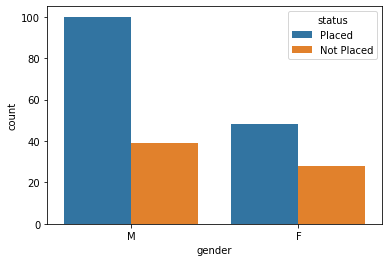

In [19]:
sns.countplot('gender', hue='status', data=data)
plt.show()

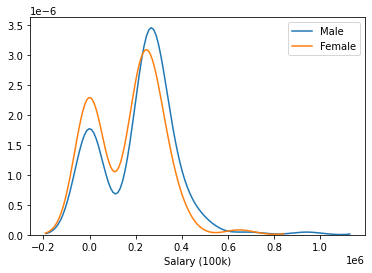

In [20]:
sns.kdeplot(data.salary[data.gender=="M"])
sns.kdeplot(data.salary[data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

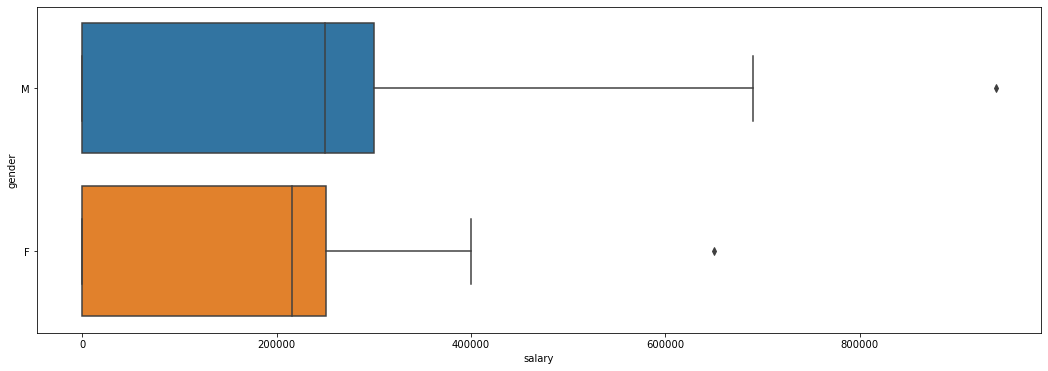

In [21]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

Insights

- We have samples of 139 Male studets and 76 Female students.
- 30 Female and 40 Male students are not placed. Male students have comparatively higher placemets.
- Male students are offered slightly greater salary than female on an average.

In [22]:
"""
Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)

Does Secondary Education affect placements?
"""

'\nFeature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)\n\nDoes Secondary Education affect placements?\n'

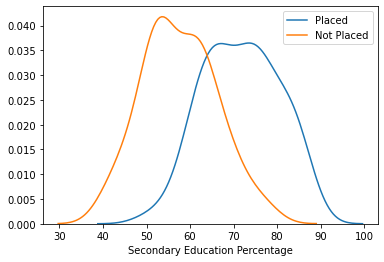

In [23]:
sns.kdeplot(data.ssc_p[data.status=="Placed"])
sns.kdeplot(data.ssc_p[data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

- All students with Secondary Education Percentage above 90% are placed
- All students with Secondary Education Percentage below 50% are not-placed
- Students with good Secondary Education Percentage are placed on average.

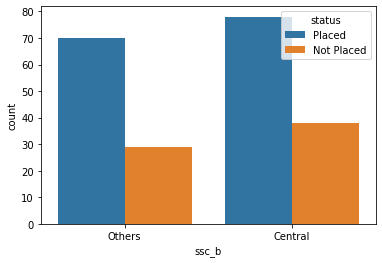

In [24]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

Board Of Education does not affect Placement Status much

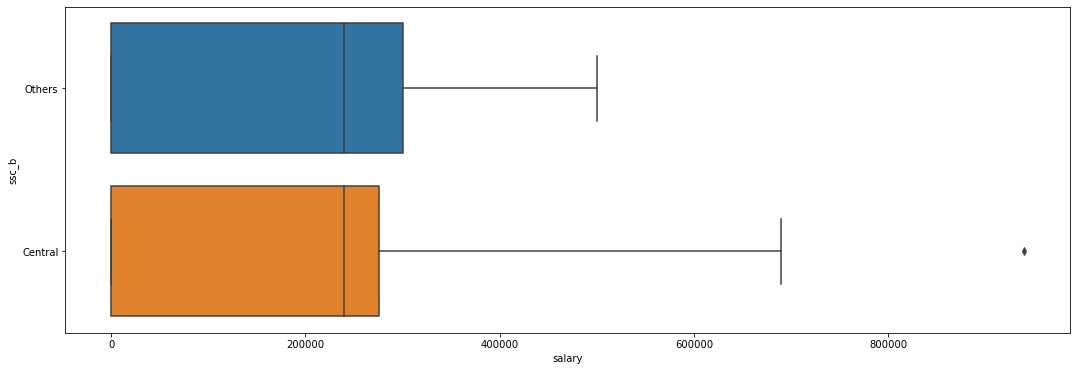

In [25]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

Outliers on both, but students from Central Board are getting the highly paid jobs.

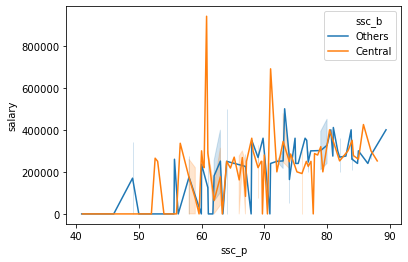

In [26]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

No specific pattern (correlation) between Secondary Education Percentage and Salary. Board of Education is Not Affecting Salary

You can make your own graph from here.

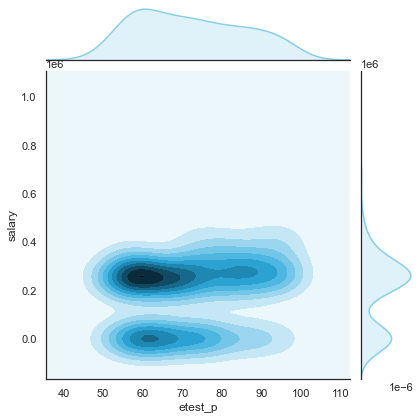

In [27]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=data["etest_p"], y=data["salary"], kind='kde', color="skyblue")

plt.show()

- Most of the candidates scored around 60 percentage got a decent package of around 3 lakhs PA
- Not many candidates received salary more than 4 lakhs PA
- The bottom dense part shows the candidates who were not placed

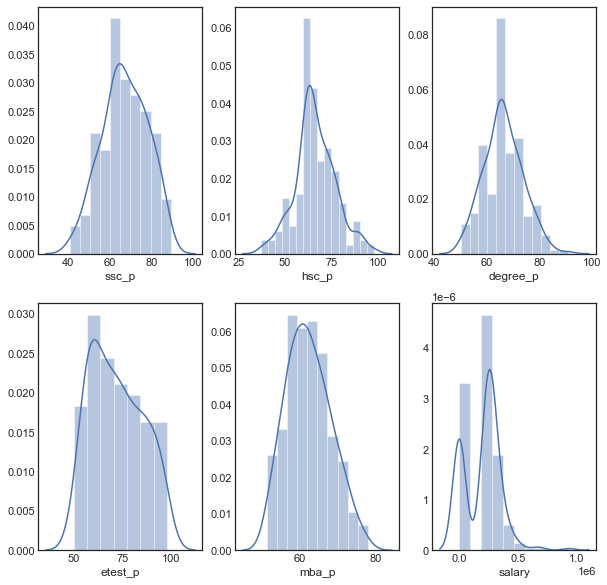

In [28]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

- All the distributions follow normal distribution except salary feature
- Most of the candidates educational performances are between 60-80%
- Salary distribution got outliers where few have got salary of 7.5L and 10L PA

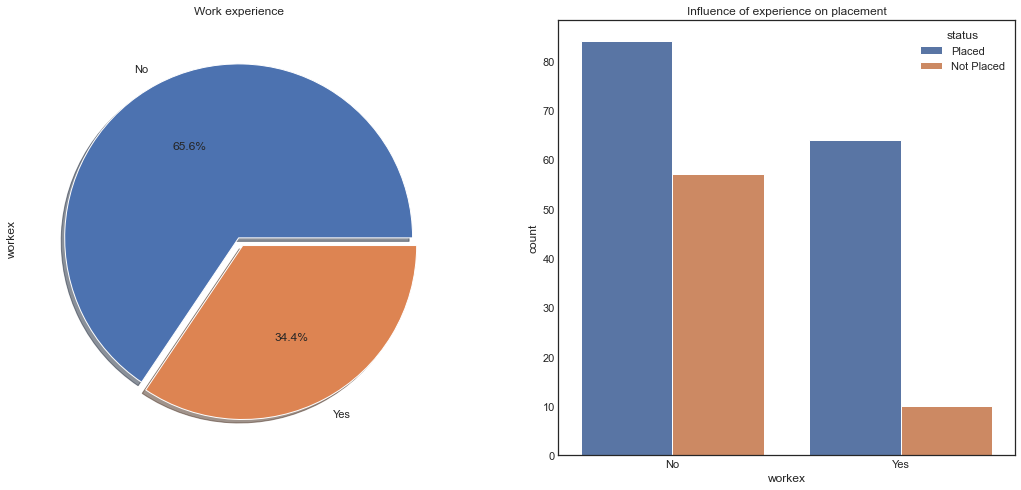

In [29]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = data)
ax[1].set_title('Influence of experience on placement')

plt.show()

- We have nearly 66.2% of candidates who never had any work experience
- Candidates who never had work experience have got hired more than the ones who had experience
- We can conclude that work experience doesn't influence a candidate in the recruitment process

## Preprocessing data for classfication models

In [30]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [32]:
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.83      0.89      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.75      0.76        65
weighted avg       0.80      0.80      0.80        65



In [35]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8615384615384616
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        21
           1       0.86      0.95      0.90        44

    accuracy                           0.86        65
   macro avg       0.87      0.81      0.83        65
weighted avg       0.86      0.86      0.86        65



In [36]:
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8769230769230769
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.88      0.95      0.91        44

    accuracy                           0.88        65
   macro avg       0.88      0.83      0.85        65
weighted avg       0.88      0.88      0.87        65



## Getting ready for deployment

In [37]:
pickle.dump(dtree, open('model_classifier.pkl','wb'))

NameError: name 'pickle' is not defined

### Thanks For Completing This Labs!

Notebook created by: [Raka Ardhi](https://ardhiraka.com/).

This notebook is part of Telkom Training Program. If you accessed this notebook outside the course, you can take Python remote course by clicking [here](https://www.hacktiv8.com/parttime/python-basic).